<a href="https://colab.research.google.com/github/wonively523/Awesome-Meta-Learning/blob/master/Assignment10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


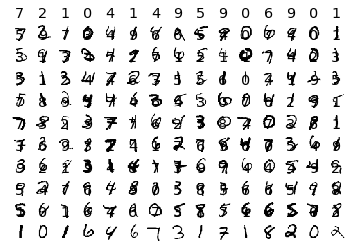

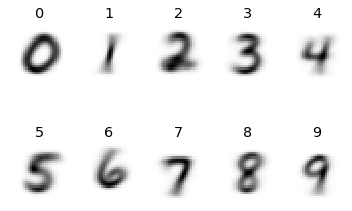

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['ggplot'])

file_data   = "/content/gdrive/My Drive/Colab Notebooks/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

# normalize the values of the input data to be [0, 1]
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# example of distance function between two vectors x and y
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# make a matrix each column of which represents an images in a vector form
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

# plot first 150 images out of 10,000 with their labels
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

# plot the average image of all the images for each digit
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]

    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()


In [0]:
data = np.loadtxt( "/content/gdrive/My Drive/Colab Notebooks/mnist.csv", delimiter=",")

In [0]:
#train & test split 
train_data=data[:6000]
print(len(train_data))
test_data=data[6000:]
print(len(test_data))

6000
4000


In [0]:
lr = np.arange(no_of_different_labels)

# transform labels into one hot representation
train_labels_one_hot = (lr==train_labels).astype(np.float)
test_labels_one_hot = (lr==test_labels).astype(np.float)

# we don't want zeroes and ones in the labels neither:
train_labels_one_hot[train_labels_one_hot==0] = 0.01
train_labels_one_hot[train_labels_one_hot==1] = 0.99
test_labels_one_hot[test_labels_one_hot==0] = 0.01
test_labels_one_hot[test_labels_one_hot==1] = 0.99

In [0]:
fac = 0.99 / 255
train_imgs = np.asfarray(train_data[:, 1:]) * fac + 0.01
test_imgs = np.asfarray(test_data[:, 1:]) * fac + 0.01

train_labels = np.asfarray(train_data[:, :1])
test_labels = np.asfarray(test_data[:, :1])

In [0]:
lr = np.arange(10)

for label in range(10):
  one_hot = (lr == label).astype(np.int)
  print("label: ", label, "in one-hot representation: ", one_hot)

label:  0 in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  1 in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  2 in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  3 in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  4 in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  5 in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  6 in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
label:  7 in one-hot representation:  [0 0 0 0 0 0 0 1 0 0]
label:  8 in one-hot representation:  [0 0 0 0 0 0 0 0 1 0]
label:  9 in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]


In [0]:
image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [0]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
activation_function = sigmoid

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)            

In [0]:
class NeuralNetwork:
 
    def __init__(self, no_of_in_nodes, no_of_out_nodes, no_of_hidden_nodes, learning_rate, bias=None):  

        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        
        self.no_of_hidden_nodes = no_of_hidden_nodes
            
        self.learning_rate = learning_rate 
        self.bias = bias
        self.create_weight_matrices()
    
        
    
    def create_weight_matrices(self):
        bias_node = 1 if self.bias else 0
        
        rad = 1 / np.sqrt(self.no_of_in_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.wih = X.rvs((self.no_of_hidden_nodes, self.no_of_in_nodes + bias_node))

        rad = 1 / np.sqrt(self.no_of_hidden_nodes + bias_node)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.who = X.rvs((self.no_of_out_nodes, self.no_of_hidden_nodes + bias_node))
        
 
    def train_single(self, input_vector, target_vector):
        bias_node = 1 if self.bias else 0
        if self.bias:
           input_vector = np.concatenate( (input_vector, [self.bias]) )
        
        output_vectors = []
        input_vector = np.array(input_vector, ndmin=2).T
        target_vector = np.array(target_vector, ndmin=2).T

        
        output_vector1 = np.dot(self.wih, input_vector)
        output_hidden = activation_function(output_vector1)
        
        if self.bias:
            output_hidden = np.concatenate((output_hidden, [[self.bias]]) )

        
        output_vector2 = np.dot(self.who, output_hidden)
        output_network = activation_function(output_vector2)
        
        output_errors = target_vector - output_network
        # update the weights:
        tmp = output_errors * output_network * (1.0 - output_network)          
        tmp = self.learning_rate  * np.dot(tmp, output_hidden.T) 
        self.who += tmp

        
        # calculate hidden errors:
        hidden_errors = np.dot(self.who.T, output_errors)
        # update the weights:
        tmp = hidden_errors * output_hidden * (1.0 - output_hidden)
        if self.bias:
            x = np.dot(tmp, input_vector.T)[:-1,:] 
        else:
            x = np.dot(tmp, input_vector.T)
        self.wih += self.learning_rate * x
        

    def train(self, data_array, labels_one_hot_array, epochs=1, intermediate_results=False):
        intermediate_weights = []
        for epoch in range(epochs):  
            for i in range(len(data_array)):
                self.train_single(data_array[i], labels_one_hot_array[i])
            if intermediate_results:
                intermediate_weights.append((self.wih.copy(), self.who.copy()))
        return intermediate_weights      
        

        
    
    def run(self, input_vector):
        if self.bias:
            input_vector = np.concatenate( (input_vector, [self.bias]) )
        input_vector = np.array(input_vector, ndmin=2).T

        output_vector = np.dot(self.wih, input_vector)
        output_vector = activation_function(output_vector)
        
        if self.bias:
            output_vector = np.concatenate( (output_vector, [[self.bias]]) )
            

        output_vector = np.dot(self.who,  output_vector)
        output_vector = activation_function(output_vector)
    
        return output_vector
    
    
    def evaluate(self, data, labels):
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i]:
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs
            

In [0]:
epochs = 50

network = NeuralNetwork(no_of_in_nodes=image_pixels, no_of_out_nodes=10, no_of_hidden_nodes=100, learning_rate=0.1, bias=None)

weights = network.train(train_imgs, train_labels_one_hot, epochs=epochs, intermediate_results=True) 

hist_acc_train=[]
hist_acc_test=[]
for epoch in range(epochs):  
    print("epoch: ", epoch)
    network.wih = weights[epoch][0]
    network.who = weights[epoch][1]
    corrects, wrongs = network.evaluate(train_imgs, train_labels)
    print("accuracy train: ", corrects / ( corrects + wrongs))    
    hist_acc_train.append(corrects / ( corrects + wrongs))               
    corrects, wrongs = network.evaluate(test_imgs, test_labels)
    print("accuracy test: ", corrects / ( corrects + wrongs)) 
    hist_acc_test.append(corrects / ( corrects + wrongs))  

epoch:  0
accuracy train:  0.8858333333333334
accuracy test:  0.889
epoch:  1
accuracy train:  0.9248333333333333
accuracy test:  0.91475
epoch:  2
accuracy train:  0.9405
accuracy test:  0.92375
epoch:  3
accuracy train:  0.9506666666666667
accuracy test:  0.926
epoch:  4
accuracy train:  0.9581666666666667
accuracy test:  0.92625
epoch:  5
accuracy train:  0.9636666666666667
accuracy test:  0.9255
epoch:  6
accuracy train:  0.9693333333333334
accuracy test:  0.927
epoch:  7
accuracy train:  0.9735
accuracy test:  0.93025
epoch:  8
accuracy train:  0.9783333333333334
accuracy test:  0.932
epoch:  9
accuracy train:  0.9825
accuracy test:  0.93425
epoch:  10
accuracy train:  0.986
accuracy test:  0.93675
epoch:  11
accuracy train:  0.9888333333333333
accuracy test:  0.93575
epoch:  12
accuracy train:  0.9905
accuracy test:  0.93775
epoch:  13
accuracy train:  0.9926666666666667
accuracy test:  0.93875
epoch:  14
accuracy train:  0.9945
accuracy test:  0.93825
epoch:  15
accuracy train: 

##1. Plot the loss curve

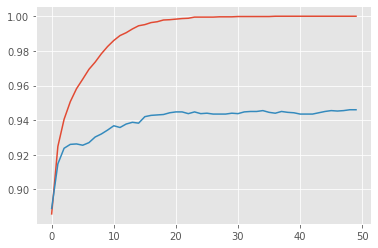

In [0]:
plt.plot(hist_acc_train)
plt.plot(hist_acc_test)
plt.show()

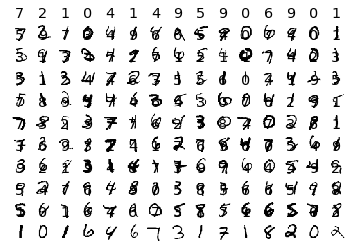

In [0]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['ggplot'])

file_data   = "/content/gdrive/My Drive/Colab Notebooks/mnist.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

# normalize the values of the input data to be [0, 1]
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

# example of distance function between two vectors x and y
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

# make a matrix each column of which represents an images in a vector form
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector

    count += 1

# plot first 150 images out of 10,000 with their labels
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)




In [0]:
x_train = train_imgs
y_train = train_labels

x_test = test_imgs
y_test = test_labels

In [0]:
# stack together for next step
X = np.vstack((x_train, x_test))
y = np.vstack((y_train, y_test))

# one-hot encoding
digits = 10
examples = y.shape[0]
y = y.reshape(1, examples)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

# number of training set
m = 6000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:, :m], Y_new[:, m:]

# shuffle training set
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [0]:
import easydict
 
args = easydict.EasyDict({
    "lr": 0.1,
    "epochs": 50,
    "n_x": 784,
    "n_h":64,
    "beta": 0.9,
    "batch_size":64})

In [0]:
# initialization
params = {"W1": np.random.randn(args.n_h, args.n_x) * np.sqrt(1. / args.n_x),
          "b1": np.zeros((args.n_h, 1)) * np.sqrt(1. / args.n_x),
          "W2": np.random.randn(digits, args.n_h) * np.sqrt(1. / args.n_h),
          "b2": np.zeros((digits, 1)) * np.sqrt(1. / args.n_h)}

In [0]:
def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

In [0]:
def compute_loss(Y, Y_hat):
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

In [0]:
def feed_forward(X, params):
    cache = {}

    # Z1 = W1.dot(x) + b1
    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]

    # A1 = sigmoid(Z1)
    cache["A1"] = sigmoid(cache["Z1"])

    # Z2 = W2.dot(A1) + b2
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]

    # A2 = softmax(Z2)
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache

In [0]:
def back_propagate(X, Y, params, cache, m_batch):
    # error at last layer
    dZ2 = cache["A2"] - Y

    # gradients at last layer (Py2 need 1. to transform to float)
    dW2 = (1. / m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1. / m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    # back propgate through first layer
    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))

    # gradients at first layer (Py2 need 1. to transform to float)
    dW1 = (1. / m_batch) * np.matmul(dZ1, X.T)
    db1 = (1. / m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [0]:
def plot_error(data,j_history):
 
  cost = j_history['j'] 
  plt.figure(figsize=(12, 8))
  plt.plot(cost,'blue')
  plt.show()

In [0]:
hist_loss_train=[]
hist_loss_test=[]

In [0]:
# training
for i in range(args.epochs):
  permutation = np.random.permutation(X_train.shape[1])
  X_train_shuffled = X_train[:, permutation]
  Y_train_shuffled = Y_train[:, permutation]

  for j in range(64):
    begin = j * args.batch_size
    end = min(begin + args.batch_size, X_train.shape[1] - 1)
    X = X_train_shuffled[:, begin:end]
    Y = Y_train_shuffled[:, begin:end]
    m_batch = end - begin
    
    cache = feed_forward(X, params)
    grads = back_propagate(X, Y, params, cache, m_batch)

    dW1 = (args.beta * grads['dW1'] + (1. - args.beta) * grads["dW1"])
    db1 = (args.beta * grads['db1'] + (1. - args.beta) * grads["db1"])
    dW2 = (args.beta * grads['dW2'] + (1. - args.beta) * grads["dW2"])
    db2 = (args.beta * grads['db2'] + (1. - args.beta) * grads["db2"])

        # gradient descent
    params["W1"] = params["W1"] - args.lr * dW1
    params["b1"] = params["b1"] - args.lr * db1
    params["W2"] = params["W2"] - args.lr * dW2
    params["b2"] = params["b2"] - args.lr * db2

    # forward pass on training set
    cache = feed_forward(X_train, params)
    train_loss = compute_loss(Y_train, cache["A2"])
    hist_loss_train.append(train_loss)
    # forward pass on test set
    cache = feed_forward(X_test, params)
    test_loss = compute_loss(Y_test, cache["A2"])
    hist_loss_test.append(test_loss)
    #print("Epoch {}: training loss = {}, test loss = {}".format(i + 1, train_loss, test_loss))

  

##2. Plot the accuracy curve

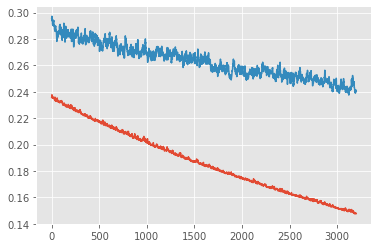

In [0]:
plt.plot(hist_loss_train)
plt.plot(hist_loss_test)
plt.show()